# Malaria EDA

### Load in packages and data

In [186]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [188]:
malaria_df = pd.read_csv('cleared_malaria_data.csv')
temps_df = pd.read_csv('clean_Global_temp.csv')

## Summary Statistics of Malaria Dataset

In [191]:
malaria_df.describe()

,Year,Malaria_count
count,888.000000,8.880000e+02
mean,2018.922297,1.795985e+06
std,2.578997,4.132241e+06
min,2015.000000,0.000000e+00
25%,2017.000000,8.020000e+02
50%,2019.000000,3.452600e+04
75%,2021.000000,1.607987e+06
max,2023.000000,2.963018e+07


In [193]:
malaria_df.nunique()

SpatialDimValueCode    102
Country                102
Year                     9
Malaria_count          790
dtype: int64

In [195]:
malaria_df.isnull().sum()

SpatialDimValueCode    0
Country                0
Year                   0
Malaria_count          0
dtype: int64

## Trend of annual case counts of malaria over time (2015-2023)

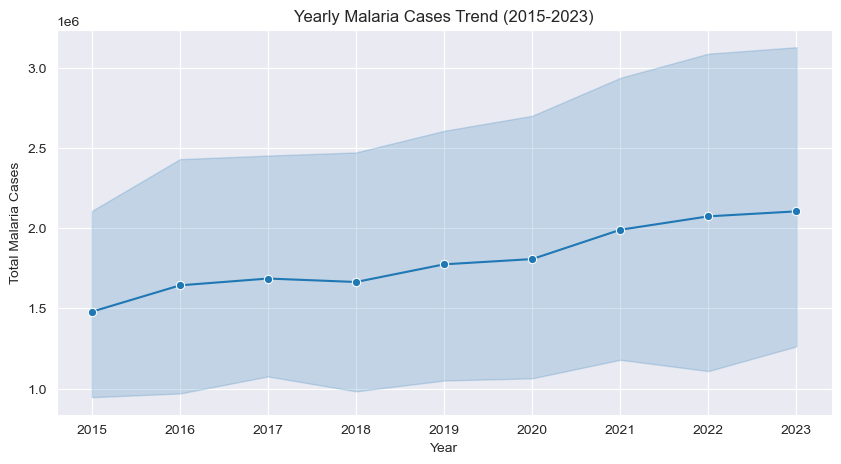

In [198]:
malaria_by_year = malaria_df.groupby("Year")["Malaria_count"].sum()

# plot for trend of malaria case counts from 2015-2023
plt.figure(figsize=(10,5))
sns.lineplot(x="Year", y="Malaria_count", data=malaria_df, marker="o")
plt.xlabel("Year")
plt.ylabel("Total Malaria Cases")
plt.title("Yearly Malaria Cases Trend (2015-2023)")
plt.show()

## Top 10 countries with the highest total counts of malaria cases between 2015-2023

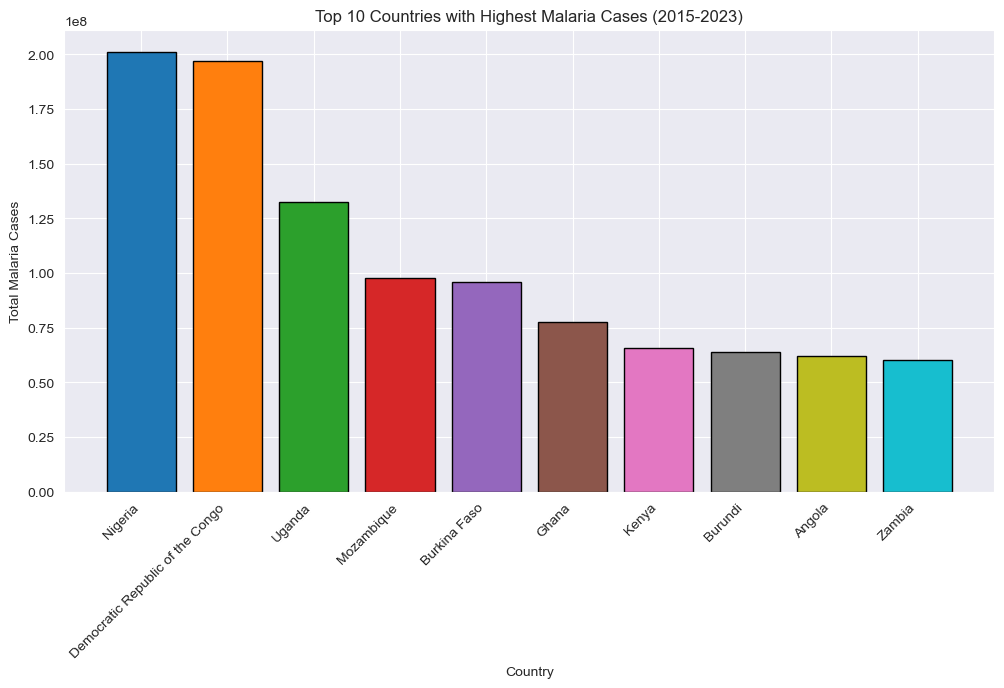

In [201]:

sns.set_style("darkgrid")

# group cases by the top 10 countries
top_countries = malaria_df.groupby("Country")["Malaria_count"].sum().nlargest(10)

# Bar chart for country level comparison of malaria counts between 2015-2023
colors = sns.color_palette("tab10", len(top_countries))
sns.set_style("darkgrid")
plt.figure(figsize=(12,6))
bars = plt.bar(top_countries.index, top_countries.values, color=colors, edgecolor="black")
plt.xlabel("Country")
plt.ylabel("Total Malaria Cases")
plt.title("Top 10 Countries with Highest Malaria Cases (2015-2023)")
plt.xticks(rotation=45, ha="right")
plt.show()

## Heatmap to show where malaria is most persistent and how it changes over time

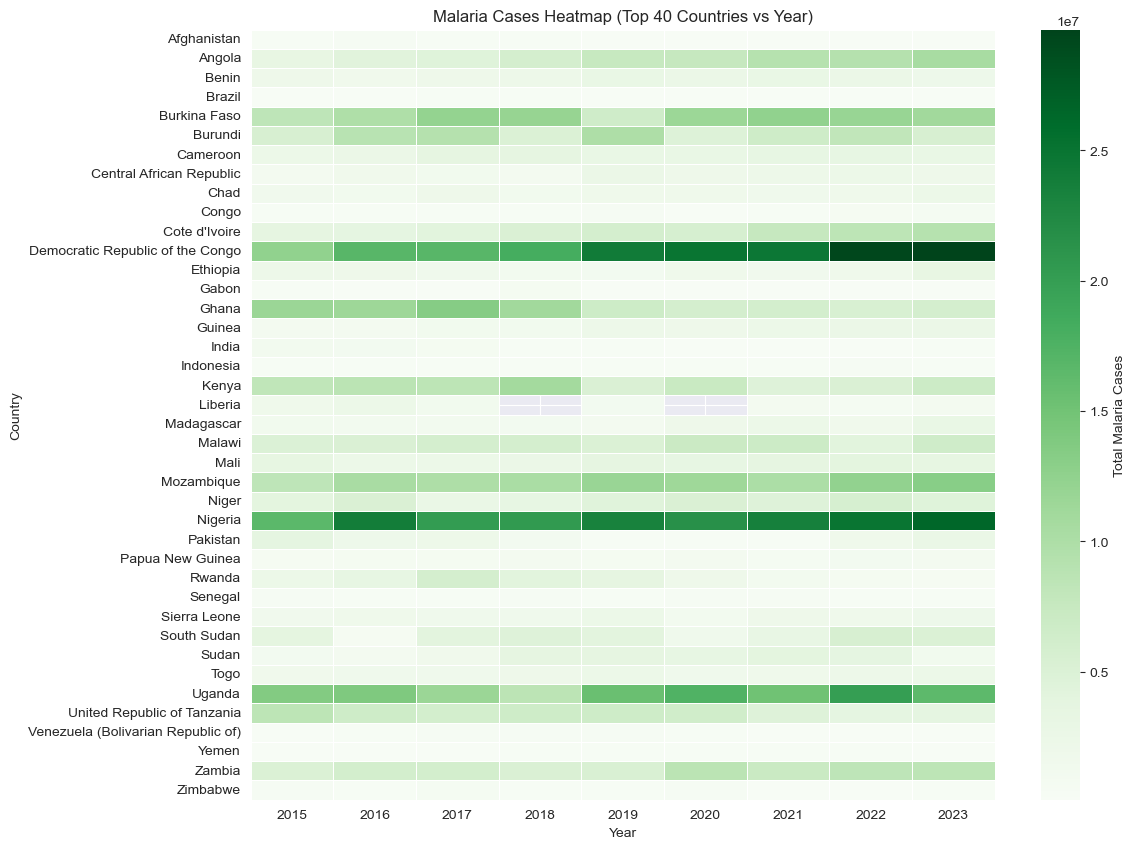

In [204]:
total_malaria_by_country = malaria_df.groupby('Country')["Malaria_count"].sum()

top_40_countries = total_malaria_by_country.nlargest(40).index

top_40_malaria_df = malaria_df[malaria_df['Country'].isin(top_40_countries)]

heatmap_data = top_40_malaria_df.pivot_table(index="Country", columns="Year", values="Malaria_count", aggfunc="sum")

# heatmap
plt.figure(figsize=(12,10))
sns.heatmap(heatmap_data, cmap="Greens", linewidths=0.5, cbar_kws={'label': 'Total Malaria Cases'})
plt.title("Malaria Cases Heatmap (Top 40 Countries vs Year)")
plt.xlabel("Year")
plt.ylabel("Country")
plt.show()


## Tempera

In [206]:
temp_yearly = temps_df.groupby(["Entity", "Year"])["Temperature"].mean().reset_index()

In [208]:
# Rename columns to match dengue data
temp_yearly.rename(columns={
    'Entity': 'Country',
    'Code' : 'Country Code'
}, inplace=True)

In [210]:
# merge malaria and temp data on country and year
df_merged = malaria_df.merge(temp_yearly, on=["Country", "Year"], how="inner")

In [212]:
df_merged.head()

,SpatialDimValueCode,Country,Year,Malaria_count,Temperature
0,PRY,Paraguay,2023,0,25.322174
1,SDN,Sudan,2023,1304528,28.378095
2,CAF,Central African Republic,2023,1979614,26.717813
3,AGO,Angola,2023,10496880,22.796457
4,SUR,Suriname,2023,102,26.640158


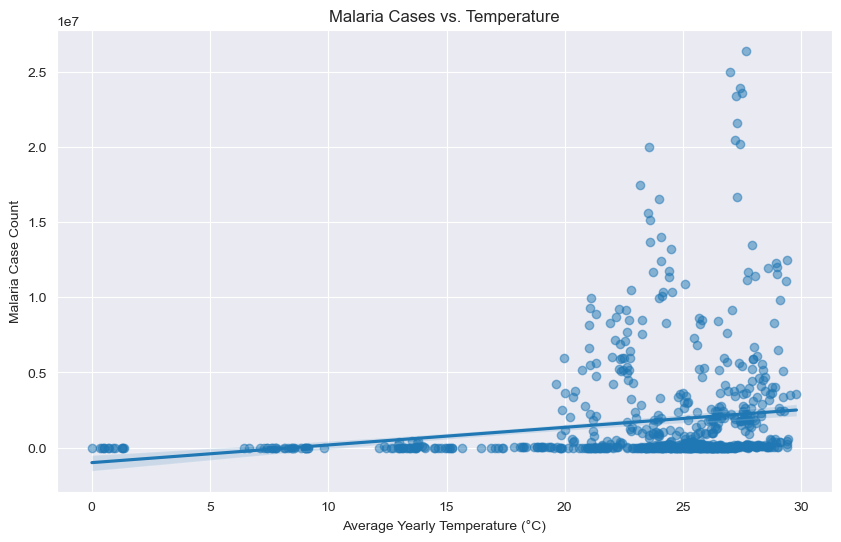

In [214]:
plt.figure(figsize=(10,6))
sns.regplot(data=df_merged, x="Temperature", y="Malaria_count", scatter_kws={'alpha':0.5})
plt.title("Malaria Cases vs. Temperature")
plt.xlabel("Average Yearly Temperature (°C)")
plt.ylabel("Malaria Case Count")
plt.show()

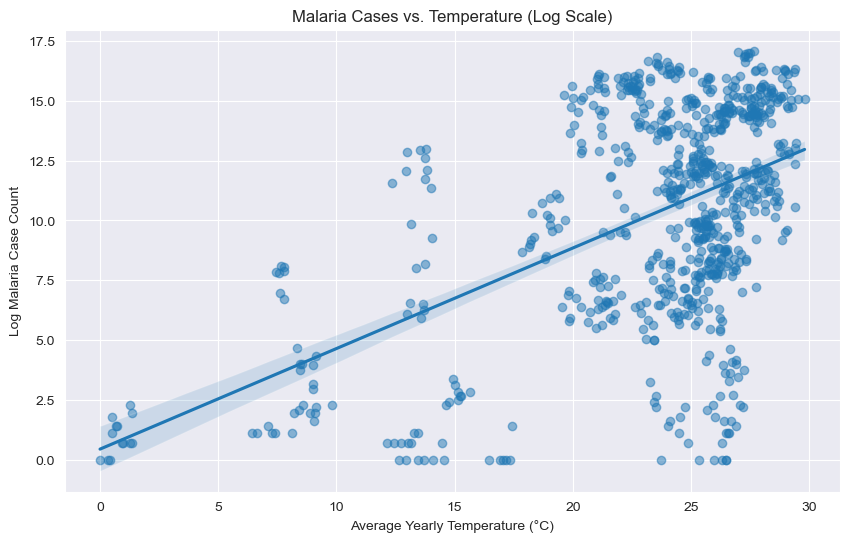

In [216]:
plt.figure(figsize=(10,6))
sns.regplot(data=df_merged, x="Temperature", y=np.log1p(df_merged["Malaria_count"]), scatter_kws={'alpha':0.5})
plt.title("Malaria Cases vs. Temperature (Log Scale)")
plt.xlabel("Average Yearly Temperature (°C)")
plt.ylabel("Log Malaria Case Count")
plt.show()

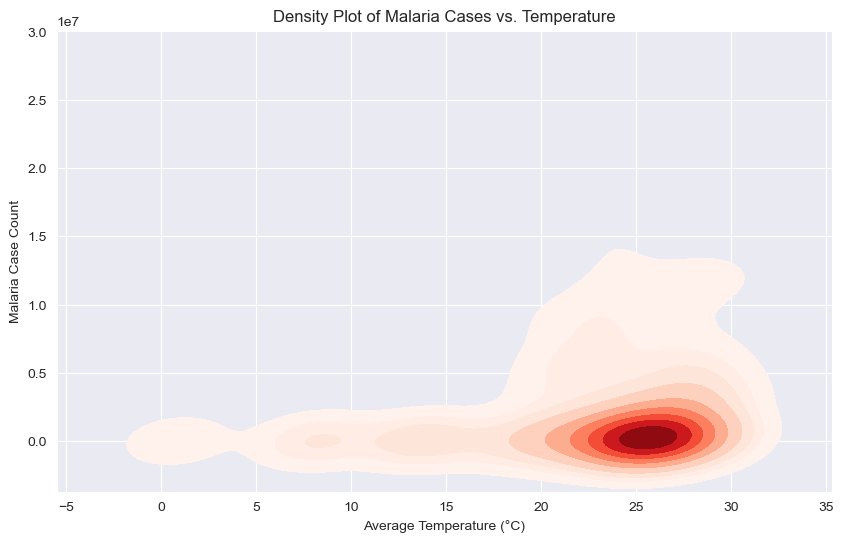

In [218]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=df_merged, x="Temperature", y=df_merged["Malaria_count"], cmap="Reds", fill=True)
plt.title("Density Plot of Malaria Cases vs. Temperature")
plt.xlabel("Average Temperature (°C)")
plt.ylabel("Malaria Case Count")
plt.show()